<a href="https://colab.research.google.com/github/esperonj/Equipo26/blob/main/Avance2_Equipo26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## Proyecto Integrador (Gpo 26)

   ### Tecnológico de Monterrey
   ### Avance 2 - Ingeniería de características

### *Automatización del Registro de Materiales Médicos mediante Visión Computacional*
### EQUIPO 26

###Luis Fernando Rojas Marta - A00757351
###Jose Eduardo Carreon - A01372413

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

# Cambia esta ruta al nombre real de tu carpeta
carpeta_img = '/content/drive/MyDrive/Labels'
carpeta_yolo = '/content/drive/MyDrive/train'
# Verifica cuántos archivos hay
archivos = os.listdir(carpeta_img)
base_yolo = os.listdir(carpeta_yolo)

imagenes = [f for f in archivos if f.endswith(('.jpg', '.JPG','.png'))]
etiquetas = [f for f in base_yolo if f.endswith('.txt')]

print(f'Imágenes: {len(imagenes)}')
print(f'Archivos de etiquetas: {len(etiquetas)}')


Imágenes: 296
Archivos de etiquetas: 296


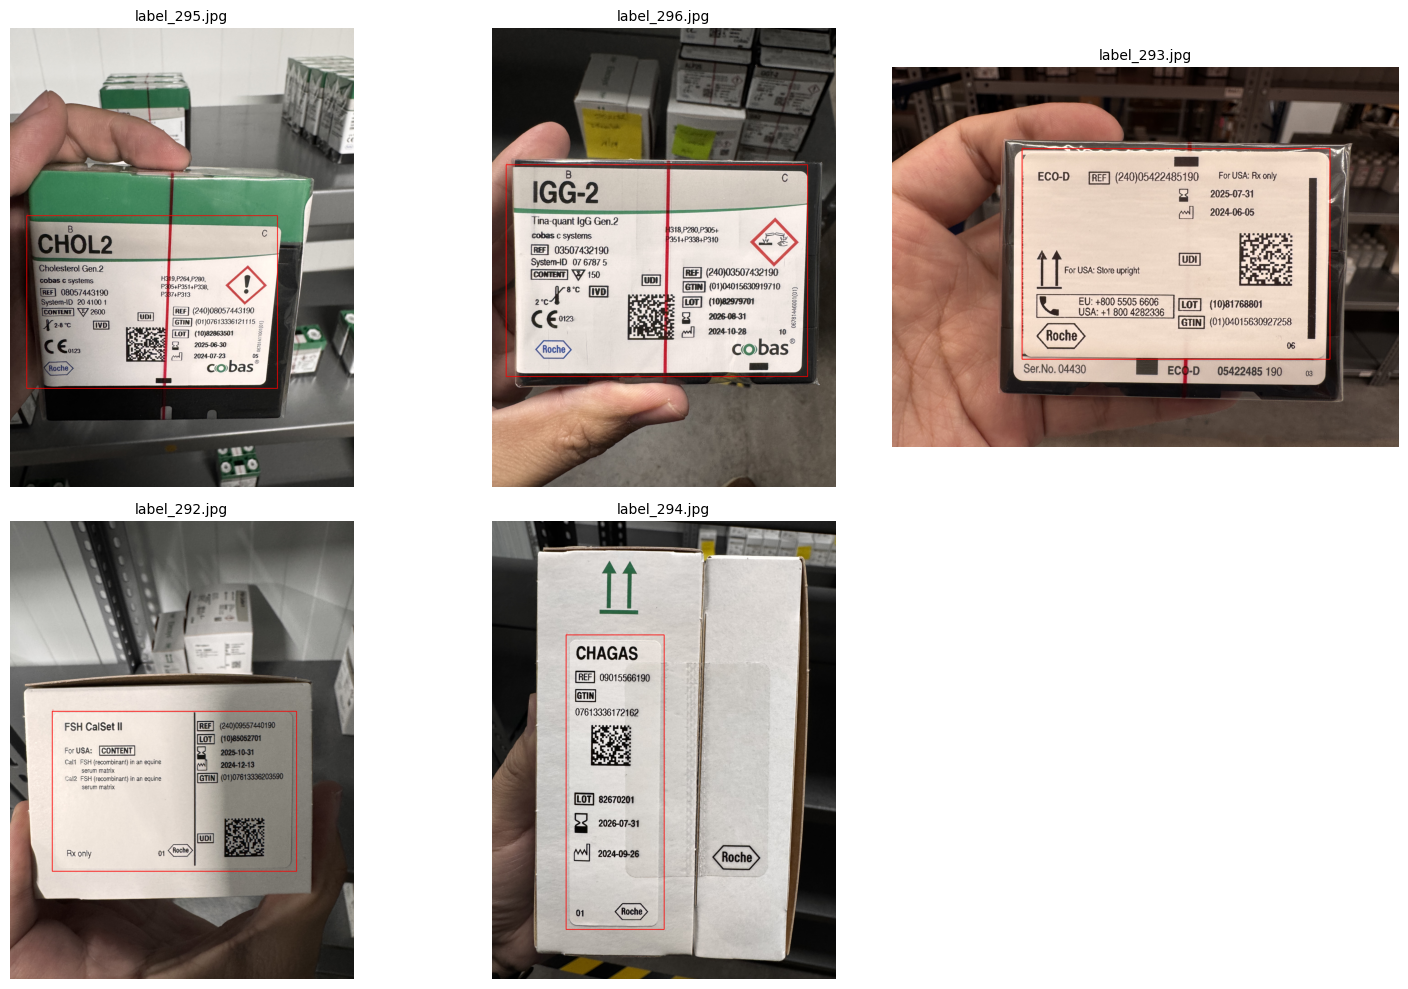

In [13]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(15, 10))

# Mostrar 5 imágenes
for i in range(5):
    ejemplo = imagenes[i]
    ruta_img = os.path.join(carpeta_img, ejemplo)
    ruta_txt = os.path.join(carpeta_yolo, ejemplo.replace('.jpg', '.txt').replace('.JPG', '.txt').replace('.png', '.txt'))

    img = cv2.imread(ruta_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Dibujar etiquetas
    if os.path.exists(ruta_txt):
        with open(ruta_txt, 'r') as f:
            for linea in f:
                clase, x_c, y_c, ancho, alto = map(float, linea.strip().split())
                x1 = int((x_c - ancho / 2) * w)
                y1 = int((y_c - alto / 2) * h)
                x2 = int((x_c + ancho / 2) * w)
                y2 = int((y_c + alto / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 5)  # GROSOR AQUÍ
                cv2.putText(img, f'{int(clase)}', (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 1)

    # Mostrar imagen
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(ejemplo, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
total_boxes = 0
for archivo in etiquetas:
    with open(os.path.join(carpeta_yolo, archivo), 'r') as f:
        total_boxes += sum(1 for _ in f)

promedio = total_boxes / len(imagenes)

print(f'Total de imágenes: {len(imagenes)}')
print(f'Total de archivos de etiquetas: {len(etiquetas)}')
print(f'Total de áreas de interés (cajas): {total_boxes}')
print(f'Promedio de áreas por imagen: {promedio:.2f}')

Total de imágenes: 296
Total de archivos de etiquetas: 296
Total de áreas de interés (cajas): 455
Promedio de áreas por imagen: 1.54
